# Lab: Social Media Engagement Analysis

**Objective:**  
Use Pandas and NumPy to clean, explore, and analyze a social media posts dataset, computing engagement metrics and identifying high‑engagement content.

**Dataset:**  
Download the dataset social_media_data.csv
It contains 500 posts with these columns:
- **post_id**: unique identifier for each post  
- **user_id**: identifier for the user who made the post (1–50)  
- **timestamp**: date and time of the post  
- **content_length**: number of characters in the post  
- **likes**, **shares**, **comments**: counts of interactions  
- **sentiment_score**: sentiment polarity (–1 to 1)  
- **follower_count**: number of followers the user had at posting time  

## Part 1: Data Loading & Initial Inspection

Load the dataset into a DataFrame:
Display the first 10 rows and use df.info() to inspect data types and non-null counts.
Check for any missing values in each column.



In [24]:
# Part 1: Load the dataset
import pandas as pd
import numpy as np

# Load CSV generated earlier (adjust path if necessary)
df = pd.read_csv('social_media_data.csv')

# Quick look at the first few rows
df.head()

,post_id,user_id,timestamp,content_length,likes,shares,comments,sentiment_score,follower_count
0,1,39,2024-03-20 08:01:40,57,20,7,6,0.395,11903
1,2,29,2024-01-31 13:25:28,153,21,3,3,0.060,3892
2,3,15,2024-10-26 06:28:39,219,27,8,4,-0.217,6093
3,4,43,2024-10-31 17:32:32,42,43,6,6,0.244,17865
4,5,8,2024-11-12 12:56:15,237,13,3,6,0.937,2470


## Part 2: Cleaning & Date Handling

Convert the timestamp column to datetime64 and set it as the DataFrame’s index.
Sort the DataFrame by index (chronological order).




In [26]:
# Part 2: Cleaning & Date Handling
# Convert timestamp column to datetime and set as index
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.set_index('timestamp').sort_index()

df.head()

,post_id,user_id,content_length,likes,shares,comments,sentiment_score,follower_count
timestamp,,,,,,,,
2024-01-01 18:47:41,299,49,237,13,2,1,0.406,846
2024-01-01 19:37:20,7,39,123,23,13,6,-0.220,11874
2024-01-02 01:36:33,200,24,80,20,4,0,0.664,2850
2024-01-03 06:56:15,42,9,44,33,6,2,-0.024,9756
2024-01-06 04:32:25,86,16,274,40,15,6,-0.341,16599


## Part 3: NumPy Basics & Summary Statistics

Extract the likes, shares, and comments columns as a NumPy array and compute:
* Mean interaction count
* Standard deviation



In [9]:
# Part 3: NumPy Basics & Summary Statistics
interactions = df[['likes', 'shares', 'comments']].to_numpy()  #note this is an array that contains all 3 items

#I did this all together in one step to make it easier...
mean_interactions = interactions.mean()
std_interactions = interactions.std()

print(f"Mean interaction count (likes + shares + comments): {mean_interactions:.2f}")
print(f"Standard deviation of interaction counts: {std_interactions:.2f}")

Mean interaction count (likes + shares + comments): 11.75
Standard deviation of interaction counts: 11.96
[[13  2  1]
 [23 13  6]
 [20  4  0]
 ...
 [12  3  3]
 [48  5  5]
 [29  6  5]]


## Part 4: Computing Engagement Rate

Use broadcasting to create a new column:
engagement_rate = (likes + shares + comments) / follower_count
Add it to the DataFrame.
Display the top 10 posts by engagement_rate.



In [28]:
# Part 4: Computing Engagement Rate
# You can also do this with numpy arrays but I can easily remember the names of the columns and 
#didn't want to make a mistake:)  

df['engagement_rate'] = (df['likes'] + df['shares'] + df['comments']) / df['follower_count']

# Top 10 posts by engagement rate
top10 = (df.sort_values('engagement_rate', ascending=False))[:10]   #create the data frame then slice it with "[:10]


top10[['user_id', 'content_length', 'engagement_rate']]

,user_id,content_length,engagement_rate
timestamp,,,
2024-11-16 13:17:38,46,252,0.056974
2025-02-03 09:48:32,40,65,0.056225
2025-04-08 09:22:44,46,245,0.045714
2024-04-07 09:36:38,40,27,0.040323
2024-05-12 10:09:34,46,200,0.036145
2024-08-18 10:07:05,40,185,0.035514
2025-02-06 10:18:54,46,80,0.033797
2024-09-28 12:12:30,46,174,0.032193
2024-02-26 19:37:27,40,215,0.032129


## Part 5: Z‑Scores & High‑Engagement Flag

Compute the z-score for each post’s engagement rate using NumPy.  
Add a Boolean column high_engagement that’s True if z‑score > 1.



In [34]:
# Part 5: Z‑Scores & High‑Engagement Flag
eng_mean = df['engagement_rate'].to_numpy().mean()   #I think you can do this directly on the df too but we've been using
eng_std = df['engagement_rate'].to_numpy().std()      #numpy
eng_rate=df['engagement_rate'].to_numpy()
z_scores = (eng_rate - eng_mean) / eng_std   #this is something you'll learn later if you haven't seen it before:) 
df['high_engagement'] = z_scores > 1

df[['engagement_rate', 'high_engagement']].head(20)  #just making sure the data looks right:)   

,engagement_rate,high_engagement
timestamp,,
2024-01-01 18:47:41,0.018913,True
2024-01-01 19:37:20,0.003537,False
2024-01-02 01:36:33,0.008421,False
2024-01-03 06:56:15,0.004203,False
2024-01-06 04:32:25,0.003675,False
2024-01-06 18:12:42,0.007107,False
2024-01-07 14:47:30,0.006605,False
2024-01-08 08:33:25,0.005934,False
2024-01-12 00:59:19,0.005880,False


## Part 6: Grouped Analysis

Group by user_id and calculate each user’s:
Average engagement rate
Total number of posts
Sort users by average engagement rate (descending) and display the top 5.



In [48]:
# Part 6: Grouped Analysis

#  https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html

#I used this link to help me:)   it's the official groupby doc

# – Group the DataFrame by user_id
grouped = df.groupby('user_id')

# Aggregate to compute the mean and count...you can only use .agg on data that has been grouped by:)
user_engage_total_posts = grouped.agg( avg_engagement_rate=('engagement_rate', 'mean'),   total_posts=('post_id', 'count'))                 
                # mean engagement per user and count of post_id.  We take the 'mean' on 'engagement rate'
                # 'mean' and 'count' are built in "operations" --- you can pass in a string indicating any of the built 
                #in functions in pandas to apply on the data.   A list is here: 
                #  https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html#dataframegroupby-computations-descriptive-stats
                #  Which says you can use any of these:) : all, any, bfill, corr, corrwith, count, cov, cumcount, cummax, 
                #                                     cummin, cumprod, cumsum, describe, ffill, fillna, first, head, idxmax, idxmin, 
                #                                     last, max, mean, median, min, ngroup, nth, ohlc, pct_change, prod, quantile, rank, resample, 
                #                                     rolling, sample, sem, shift, size, skew, std, sum, var, tail, take, value_counts 
                #the two new columns are avg_engagement_rate and total_posts


                           
#  Sort users by the average engagement rate (highest ⇒ lowest)
user_stats = user_engage_total_posts.sort_values( 'avg_engagement_rate', ascending=False)

print("before reset")
print(user_stats.head(5))
# (Optional) Bring user_id back as a normal column
user_stats = user_stats.reset_index()
print("after reset")

# user_stats now contains the final result
print(user_stats.head(5))   #note that this just adds a nice column that is useful if you want to write this back out to a csv.





hey
         avg_engagement_rate  total_posts
user_id                                  
46                  0.037648            7
40                  0.031862           11
49                  0.019626           13
17                  0.015071            8
21                  0.009603            7
reset
   user_id  avg_engagement_rate  total_posts
0       46             0.037648            7
1       40             0.031862           11
2       49             0.019626           13
3       17             0.015071            8
4       21             0.009603            7


,avg_engagement_rate,total_posts
user_id,,
46,0.037648,7
40,0.031862,11
49,0.019626,13
17,0.015071,8
21,0.009603,7


## Part 7: Correlation & Advanced NumPy (Bonus stuff)

Convert the content_length and engagement_rate columns to NumPy arrays.
Google the Pearson correlation coefficient:)  Briefly copy paste what it is and how we can use it.  Calculate the Pearson correlation coefficient between content length and engagement rate using NumPy’s vectorized operations.  What does this tell us?  (This will not be on a test.)  



In [58]:
# Part 7: Correlation & Advanced NumPy
content_len = df['content_length'].to_numpy()
eng_rate = df['engagement_rate'].to_numpy()

# Pearson correlation via NumPy
corr = np.corrcoef(content_len, eng_rate)
print(corr)

#You see this is a matrix and the data we need is in the first row second column so I'm going to slice it out!
corr=corr[0,1]

# Think of this corr as a single-number summary that tells you how tightly two sets of numbers march together in a straight-line pattern.
# Notes
#Range of the Pearson's coefficient 
    #Plus one perfect upward march: every time the first value rises, the second rises in lockstep.
    #Zero    no clear straight-line march: knowing one value gives you little clue about the other.
    #Minus one  perfect downward march: as one value rises, the other falls in step.
# Direction  (another way to think about it...
    #A positive r means both variables tend to grow or shrink together.
    #A negative r means one variable grows while the other tends to shrink.

#0.017 means no correlation between content length and engagement rate:) 



print(f"Pearson correlation between content length and engagement rate: {corr:.3f}")

[[1.         0.01716401]
 [0.01716401 1.        ]]
Pearson correlation between content length and engagement rate: 0.017


## Part 8: Exporting Results

Save the updated DataFrame (with new columns) to analysis_results.csv:

df.to_csv('analysis_results.csv', index=False)



In [ ]:
# Part 8: Exporting Results
df.to_csv('analysis_results.csv', index=False)
print('Results saved to analysis_results.csv')

## Part 9: Plotting and Investigating Trends:

Plot the distribution of engagement_rate with Matplotlib.
Identify any time‑based trends (e.g., average engagement by hour of day).

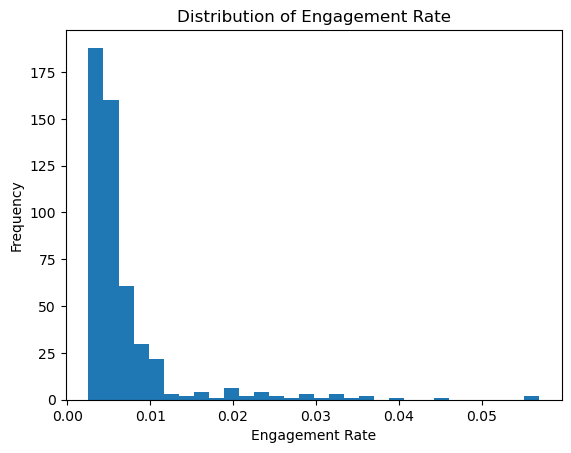

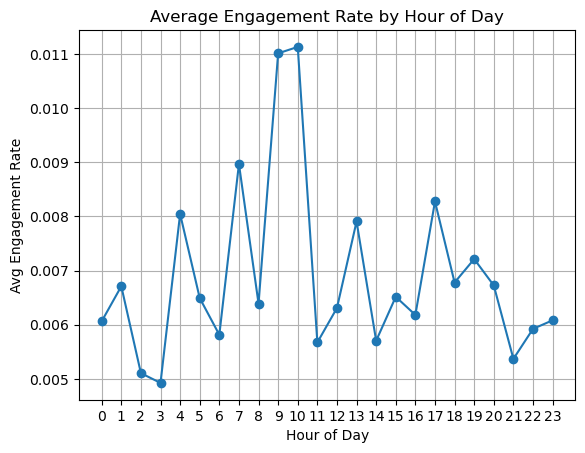

In [61]:
# Part 9: Plotting and Investigating Trends
import matplotlib.pyplot as plt

# Histogram of engagement rate
plt.figure()
plt.hist(df['engagement_rate'], bins=30)
plt.title('Distribution of Engagement Rate')
plt.xlabel('Engagement Rate')
plt.ylabel('Frequency')
plt.show()

# Average engagement rate by hour of day
df['hour'] = df.index.hour
hourly_eng = df.groupby('hour')['engagement_rate'].mean()

plt.figure()
plt.plot(hourly_eng.index, hourly_eng.values, marker='o')
plt.title('Average Engagement Rate by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Avg Engagement Rate')
plt.xticks(range(0,24))
plt.grid(True)
plt.show()